# 02 Customise OWS colour schemes

This notebook details how to:

* Choose a colour scheme, including some useful websites
* Test for accessibility
* Convert a colour scheme into hex codes
* Add hex codes to an OWS colour style

## 2.1 Choose a colour scheme

**What is my data about?**

The two most common types of data in DE Africa are:

* Sequential: One end of the scale represents more of something, the other represents less - i.e. rainfall, slope, frequency of water observations
* Diverging: On either sides of a particular threshold, the values imply different states - i.e. NDVI, MNDWI, most normalised indices

Colour maps are likewise sequential or diverging so pick one that suits. 

**What do people think your data is about?**

* Blue implies water, be careful using it on datasets tangentially related or unrelated to water
* Green implies vegetation

**Accessibility**

* Choose colour schemes which are colour-vision impaired friendly
* Perceptually-uniform colour schemes represent data better
* The DE Africa Map has both light and dark background scheme settings, which show very light or very dark colours (for instance, at either ends of a scale) quite differently


**Where can I find colour palettes / packages?**

Matplotlib has several in-built colour maps which are accessibility-friendly and perceptually uniform. Read more about colourmaps on the [Matplotlib docs](https://matplotlib.org/stable/tutorials/colors/colormaps.html), including why the default is no longer `jet` but `viridis`. `viridis` itself is [well-documented](https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html).

For a simple colour map picker use:

* [Colorbrewer](https://colorbrewer2.org/)

Other recommended sites include:

* [cmocean](https://matplotlib.org/cmocean/)
* [seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [Fabio Crameri colour maps](https://www.fabiocrameri.ch/colourmaps/)

**Avoid**

* Avoid red-to-green colour schemes as deuteranopia (green colourblindness) is one of the most common colour vision deficiencies
* Avoid rainbow colour schemes (unless they are particularly suitable to the data). One example of circular colour map use is for tidal phase data where the direction of the tides goes from 0 to 360 degrees. However, not all colour maps are made equal - look to `turbo` or `cmocean.phase` rather than `jet`

**Check**

* What colour schemes the other DE Africa Map datasets are using
* How you can make existing imagery more accessible

## 2.2 Test for accessibility

Check your selected colour map or final image on a colour-blindness simulator such as [Coblis](https://www.color-blindness.com/coblis-color-blindness-simulator/).

Check how the NDVI map from the previous notebook shows up under deuteranopia conditions!

## 2.3 Colourmap to hex codes

OWS colour ramps use discrete hex colour codes and interpolates bewteen them. Most matplotlib and seaborn colour schemes are continuous colour maps, so you will need to convert them into a series of hex codes. The number of hex codes depends on how many intervals your colour ramp has. This is normally >5.

**Matplotlib**: To turn them into discrete hexcodes, we can use the following code from [StackOverflow](https://stackoverflow.com/questions/33596491/extract-matplotlib-colormap-in-hex-format).

In [2]:
from pylab import *

cmap = cm.get_cmap('cividis', 8)  # name of palette, number of discrete colours

for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))

#00224e
#213b6e
#4c556c
#6c6e72
#8e8978
#b1a570
#d9c55c
#fee838


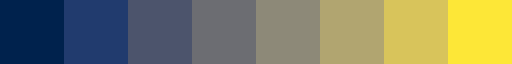

In [3]:
cmap

**Seaborn**: has its own in-built palette visualiser. The first input is the name of the palette; the second, the number of discrete colours.

In [5]:
import seaborn as sns

seaborn_hex = sns.color_palette("mako",13)
seaborn_hex

[(0.11761516, 0.06824548, 0.12116393),
 (0.18195582, 0.11955283, 0.23136943),
 (0.22758415, 0.17419169, 0.35075983),
 (0.25307401, 0.23772973, 0.48316271),
 (0.24129828, 0.31286235, 0.58278615),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20692679, 0.48201774, 0.63812656),
 (0.20344718, 0.56074869, 0.65649508),
 (0.21177544, 0.63965621, 0.67145005),
 (0.25187832, 0.71827158, 0.67872193),
 (0.34968889, 0.79827511, 0.67685638),
 (0.54578602, 0.8544913, 0.69848331),
 (0.72606665, 0.90374337, 0.7800041)]

They can then be converted into hexcodes by printing `.as_hex()`.

In [6]:
print(seaborn_hex.as_hex())

['#1e111f', '#2e1e3b', '#3a2c59', '#413d7b', '#3e5095', '#37659e', '#357ba3', '#348fa7', '#36a3ab', '#40b7ad', '#59ccad', '#8bdab2', '#b9e6c7']


## 2.4 Hex codes to OWS colour ramp

OWS colour ramps are a list of dictionaries. They are independent of dataset, so you can apply a colour ramp to multiple datasets if they have the same data range.

**Example**: A yellow-green-blue colour ramp, originally made for MrVBF. 

MrVBF (part of `srtm_deriv`) is a sequential dataset that takes on integer values from 0 to 7 inclusive. For each value, a `"color"` key is also defined, followed by the colour hex code as a string. The optional `"alpha"` value can be used to make the lowest value transparent (for example WOfS "never water" areas are transparent). It has been commented out here.

Even though this colour ramp was "designed" for MrVBF it can also successfully be applied to any MrRTF datasets, which also contains integer values from 0 to 7. 

It would not work on a Sentinel-2 Surface Reflectance dataset, because all those datasets take values from 1 to 10000. So almost every data point would be given the `#0c2c84` colour.

In [ ]:
ylgnbu = [
    {"value": 0, "color": "#ffffd9", #"alpha": 0.0
    },
    {"value": 1, "color": "#edf8b1"},
    {"value": 2, "color": "#c7e9b4"},
    {"value": 3, "color": "#7fcdbb"},
    {"value": 4, "color": "#41b6c4"},
    {"value": 5, "color": "#1d91c0"},
    {"value": 6, "color": "#225ea8"},
    {"value": 7, "color": "#0c2c84"}
]

**Example**: A blue colour ramp originally made for WOfS All-time.

* OWS interpolates between specified values
* The hex codes match the 13-interval `mako` palette shown above
* Technically not perceptually uniform due to the staggered colours at the low end


In [ ]:
blues_frequency = [
        {"value": 0.0, "color": "#FFFFFF", "alpha": 0.0},
        {"value": 0.002, "color": "#FFFFFF", "alpha": 0.0},
        {"value": 0.005, "color": '#b9e6c7', "alpha": 0.25},
        {"value": 0.01, "color": '#8bdab2', "alpha": 0.75},
        {"value": 0.02, "color": '#59ccad'},
        {"value": 0.05, "color": '#40b7ad'},
        {"value": 0.1, "color": '#36a3ab'},
        {"value": 0.2, "color": '#348fa7'},
        {"value": 0.3, "color": '#357aa2'},
        {"value": 0.4, "color": '#37659e'},
        {"value": 0.5, "color": '#3e5095'},
        {"value": 0.6, "color": '#413d7b'},
        {"value": 0.7, "color": '#3a2c59'},
        {"value": 0.8, "color": '#2e1e3b'},
        {"value": 0.9, "color": '#1e111f'},
    ]

Now you can define multiple colour ramps, put them in styles, then plot them using `plot_image_with_style_cfg()`, as per the previous notebook.